In [1]:
import seaborn as sns
import pandas as pd

In [2]:
ava_data = pd.read_csv("../data/ava.csv")

In [3]:
ava_data["avg_score"] = ava_data["avg_score"].apply(lambda x: round((x // 0.2) * 0.2, 2))
ava_data.describe()

,index,img_id,avg_score
count,10000.000000,10000.000000,10000.000000
mean,128085.370900,467623.470500,5.277480
std,73368.856099,297471.156373,0.732368
min,23.000000,66.000000,2.000000
25%,64788.500000,196476.500000,4.800000
50%,127174.500000,461974.500000,5.200000
75%,192055.500000,741343.500000,5.800000
max,255530.000000,958275.000000,8.200000


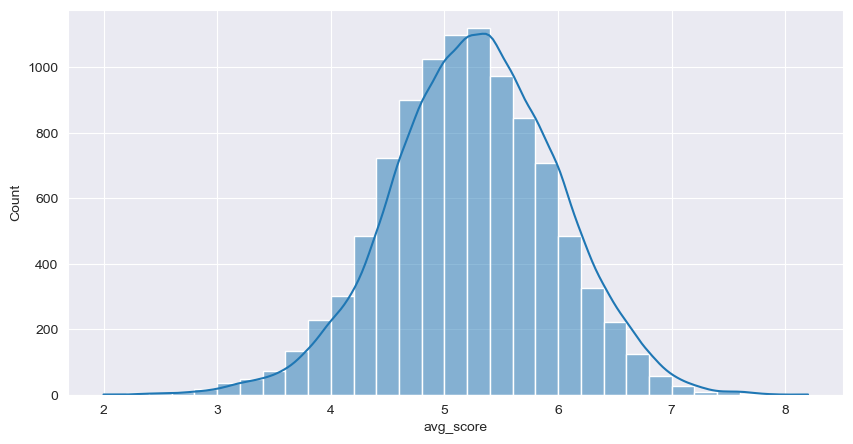

In [4]:
score_count = ava_data[["avg_score", "index"]].groupby("avg_score").count()
score_count.reset_index(inplace=True)

ax = sns.histplot(ava_data, x="avg_score", binwidth=0.2, kde=True)
ax.figure.set_size_inches(10, 5)

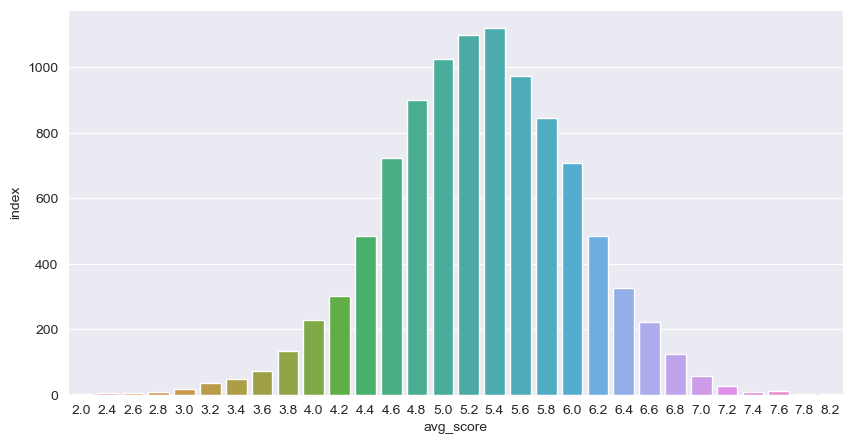

In [5]:
ax = sns.barplot(score_count, x="avg_score", y="index")
ax.figure.set_size_inches(10, 5)